# IMPORTS

Needed imports to load the test dataset and run the custom Yolo model

In [1]:
import os
from natsort import natsorted
import cv2
import imutils
import matplotlib.pyplot as plt
import numpy as np
from math import trunc
import json

import tensorflow as tf
from tensorflow import keras
from keras import backend as K
from keras.models import Sequential 
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.layers.core import Dense, Dropout, Activation 
from keras.utils import np_utils
from keras.layers import LeakyReLU   
from keras.regularizers import l2  
from keras.models import Model                   

def listdir_fullpath(d):
    return [os.path.join(d, f) for f in os.listdir(d)]

# YOLO detector

Load the model architecture and its previuosly trained weights 

In [11]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization, Flatten, LeakyReLU, MaxPooling2D, Conv2D, Reshape, Concatenate, Activation, Input, SeparableConv2D
K.clear_session()
lrelu = LeakyReLU(alpha = 0.1)

#---------#
# YOLO v2 #
#------ --#
yolo =  Sequential()

yolo.add(SeparableConv2D(filters=16, kernel_size= (7, 7), strides=(1, 1), input_shape =(448, 448, 3), padding = 'same', activation=lrelu, kernel_regularizer=l2(5e-4)))
yolo.add(BatchNormalization())
yolo.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding = 'same'))

yolo.add(SeparableConv2D(filters=48, kernel_size= (3, 3), padding = 'same', activation=lrelu, kernel_regularizer=l2(5e-4)))
yolo.add(BatchNormalization())
yolo.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding = 'same'))

yolo.add(SeparableConv2D(filters=32, kernel_size= (1, 1), padding = 'same', activation=lrelu, kernel_regularizer=l2(5e-4)))
yolo.add(BatchNormalization())
yolo.add(SeparableConv2D(filters=64, kernel_size= (3, 3), padding = 'same', activation=lrelu, kernel_regularizer=l2(5e-4)))
yolo.add(BatchNormalization())
yolo.add(SeparableConv2D(filters=32, kernel_size= (1, 1), padding = 'same', activation=lrelu, kernel_regularizer=l2(5e-4)))
yolo.add(BatchNormalization())
yolo.add(SeparableConv2D(filters=64, kernel_size= (3, 3), padding = 'same', activation=lrelu, kernel_regularizer=l2(5e-4)))
yolo.add(BatchNormalization())
yolo.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding = 'same'))

yolo.add(SeparableConv2D(filters=64, kernel_size= (1, 1), padding = 'same', activation=lrelu, kernel_regularizer=l2(5e-4)))
yolo.add(BatchNormalization())
yolo.add(SeparableConv2D(filters=128, kernel_size= (3, 3), padding = 'same', activation=lrelu, kernel_regularizer=l2(5e-4)))
yolo.add(BatchNormalization())
yolo.add(SeparableConv2D(filters=64, kernel_size= (1, 1), padding = 'same', activation=lrelu, kernel_regularizer=l2(5e-4)))
yolo.add(BatchNormalization())
yolo.add(SeparableConv2D(filters=128, kernel_size= (3, 3), padding = 'same', activation=lrelu, kernel_regularizer=l2(5e-4)))
yolo.add(BatchNormalization())
yolo.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding = 'same'))

yolo.add(SeparableConv2D(filters=128, kernel_size= (1, 1), padding = 'same', activation=lrelu, kernel_regularizer=l2(5e-4)))
yolo.add(BatchNormalization())
yolo.add(SeparableConv2D(filters=256, kernel_size= (3, 3), padding = 'same', activation=lrelu, kernel_regularizer=l2(5e-4)))
yolo.add(BatchNormalization())
yolo.add(SeparableConv2D(filters=128, kernel_size= (1, 1), padding = 'same', activation=lrelu, kernel_regularizer=l2(5e-4)))
yolo.add(BatchNormalization())
yolo.add(SeparableConv2D(filters=256, kernel_size= (3, 3), padding = 'same', activation=lrelu, kernel_regularizer=l2(5e-4)))
yolo.add(BatchNormalization())
yolo.add(SeparableConv2D(filters=256, kernel_size= (3, 3), padding = 'same', activation=lrelu, kernel_regularizer=l2(5e-4)))
yolo.add(BatchNormalization())
yolo.add(SeparableConv2D(filters=256, kernel_size= (3, 3), padding = 'same', strides = (2,2), activation=lrelu, kernel_regularizer=l2(5e-4)))
yolo.add(BatchNormalization())

yolo.add(SeparableConv2D(filters=256, kernel_size= (3, 3), activation=lrelu, kernel_regularizer=l2(5e-4)))
yolo.add(BatchNormalization())
yolo.add(SeparableConv2D(filters=256, kernel_size= (3, 3), activation=lrelu, kernel_regularizer=l2(5e-4)))
yolo.add(BatchNormalization())

yolo.add(Flatten())
yolo.add(Dense(128))
yolo.add(Dense(256))
yolo.add(BatchNormalization())
yolo.add(Dense(245, activation='sigmoid'))

yolo.add(Reshape((7,7,5), input_shape=(245,)))
 
yolo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 separable_conv2d (Separable  (None, 448, 448, 16)     211       
 Conv2D)                                                         
                                                                 
 batch_normalization (BatchN  (None, 448, 448, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 224, 224, 16)     0         
 )                                                               
                                                                 
 separable_conv2d_1 (Separab  (None, 224, 224, 48)     960       
 leConv2D)                                                       
                                                                 
 batch_normalization_1 (Batc  (None, 224, 224, 48)     1

                                                                 
 dense (Dense)               (None, 128)               3276928   
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 batch_normalization_18 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 245)               62965     
                                                                 
 reshape (Reshape)           (None, 7, 7, 5)           0         
                                                                 
Total params: 3,814,328
Trainable params: 3,808,952
Non-trainable params: 5,376
_________________________________________________________________


In [12]:
yolo.load_weights(r'D:\Yolo_Person\CheckPoints\yolo_v2_DW.h5')

# TEST Dataset

Download from fiftyOne the test COCO dataset containing images with zero or more persons 

In [13]:
f = open(r'D:\Yolo_Test\DATASET\labels.json')
data = json.load(f)
annotations = data['annotations']
every_path = []
cols = 10
rows = 578
bbox_size = 4
counters = [0] * rows
bboxes = [[] for i in range(rows)] 
items = 0
# Creation of the list of paths of images in the dataset and bboxes
# This elements are extracted from the json file downloaded from coco with the dataset
persons = listdir_fullpath(r'D:\Yolo_Test\DATASET\Person')
for entry in data['annotations']:
    class_id = entry['category_id']
    if (class_id == 1):
        img_id = entry['image_id']
        path = float(img_id)/pow(10,11)
        dec_path = format(path, '.11f')
        dec_path = dec_path.replace('.', '') + ".jpg"
        final_path = "D:\\Yolo_Test\\DATASET\\Person\\" + dec_path
        if(persons.count(final_path) != 0):
            if(every_path.count(final_path) == 0):
                every_path.append(final_path)
                bboxes[items].append(entry['bbox'])
                items = items + 1
            else:
                index = every_path.index(final_path)
                if(counters[index] + 1 < 30):
                    bboxes[index].append(entry['bbox'])
                    counters[index] = counters[index] + 1
                    
non_persons = listdir_fullpath(r'D:\Yolo_Test\DATASET\nonPerson')
for i in range(0, len(non_persons)):
    every_path.append(non_persons[i])

print("The notebook is evaluating performances over " + str(len(every_path)) + " images of different sizes")

The notebook is evaluating performances over 578 images of different sizes


In [14]:
#Creation of the scaled down 448x448 version of the ground truth bboxes 
test_bboxes_scaled = []
for i in range(0,len(every_path)):
    bboxes_it = []
    original_img = load_img(every_path[i])
    width, height = original_img.size
    scale_w = 448 / width 
    scale_h = 448 / height
    
    for box in bboxes[i]:
        xleft = int(box[0] * scale_w)
        yleft = int(box[1] * scale_h)
        b_width = int(box[2] * scale_w)
        b_height = int(box[3] * scale_h)
        new_bbox = [xleft,yleft,b_width,b_height]
        bboxes_it.append(new_bbox)
    test_bboxes_scaled.append(bboxes_it)

# Support Functions for testing

In [6]:
def calc_iou(gt_bbox, pred_bbox):
    '''
    This function takes the predicted bounding box and ground truth bounding box and 
    return the IoU ratio
    '''
    x_topleft_gt, y_topleft_gt, x_bottomright_gt, y_bottomright_gt= gt_bbox[0] , gt_bbox[1], gt_bbox[0] + gt_bbox[2] , gt_bbox[1] + gt_bbox[3]
    P,x_topleft_p, y_topleft_p, x_bottomright_p, y_bottomright_p= pred_bbox[0], pred_bbox[1] , pred_bbox[2], pred_bbox[1] + pred_bbox[3] , pred_bbox[2] + pred_bbox[4]
        
         
    #if the GT bbox and predcited BBox do not overlap then iou=0
    if(x_bottomright_gt< x_topleft_p):
        # If bottom right of x-coordinate  GT  bbox is less than or above the top left of x coordinate of  the predicted BBox
        
        return 0.0
    if(y_bottomright_gt< y_topleft_p):  # If bottom right of y-coordinate  GT  bbox is less than or above the top left of y coordinate of  the predicted BBox
        
        return 0.0
    if(x_topleft_gt> x_bottomright_p): # If bottom right of x-coordinate  GT  bbox is greater than or below the bottom right  of x coordinate of  the predcited BBox
        
        return 0.0
    if(y_topleft_gt> y_bottomright_p): # If bottom right of y-coordinate  GT  bbox is greater than or below the bottom right  of y coordinate of  the predcited BBox
        
        return 0.0
    
    
    GT_bbox_area = (x_bottomright_gt -  x_topleft_gt + 1) * (  y_bottomright_gt -y_topleft_gt + 1)
    Pred_bbox_area =(x_bottomright_p - x_topleft_p + 1 ) * ( y_bottomright_p -y_topleft_p + 1)
    
    x_top_left =np.max([x_topleft_gt, x_topleft_p])
    y_top_left = np.max([y_topleft_gt, y_topleft_p])
    x_bottom_right = np.min([x_bottomright_gt, x_bottomright_p])
    y_bottom_right = np.min([y_bottomright_gt, y_bottomright_p])
    
    intersection_area = (x_bottom_right- x_top_left + 1) * (y_bottom_right-y_top_left  + 1)
    
    union_area = (GT_bbox_area + Pred_bbox_area - intersection_area)
    return intersection_area/union_area

In [7]:
def get_single_image_results(gt_boxes, pred_boxes, iou_thr):
    """Calculates number of true_pos, false_pos, false_neg from single batch of boxes.
    Args:
        gt_boxes (list of list of floats): list of locations of ground truth
            objects as [xlest, yleft, width, height]
        pred_boxes (dict): dict of dicts of 'boxes' (formatted like `gt_boxes`)
            and 'scores'
        iou_thr (float): value of IoU to consider as threshold for a
            true prediction.
    Returns:
        dict: true positives (int), false positives (int), false negatives (int)
    """
    
    if len(gt_boxes)==0:
        tp=0
        fp=len(pred_boxes)
        fn=0
        return [tp, fp, fn]
    
    if len(pred_boxes)==0 & len(gt_boxes) != 0:
        tp=0
        fp=0
        fn=len(gt_boxes)
        return [tp, fp, fn]

    if len(pred_boxes)==0 & len(gt_boxes) == 0:
        tp=0
        fp=0
        fn=len(gt_boxes)
        return [tp, fp, fn]
    
    tp = 0
    for i in range(0, len(gt_boxes)):
        for h in range(0, len(pred_boxes)):
            if(calc_iou(gt_boxes[i],pred_boxes[h]) >= iou_thr):
                if(tp < len(pred_boxes)):
                    tp += 1
                    break
    fp = len(pred_boxes) - tp
    fn = len(gt_boxes) - tp

    return [tp, fp, fn]

In [8]:
#Function to transform the output of the network in the correct format
def decode_net_out(out):
    # IN : out [7x7x5]
    # RETURNS : bboxes [list] of the best training boxes
    cell_size = 448/7
    bboxes = []
    confidences = []
    for i in range(0,7):
        for j in range(0,7):
            if out[i][j][0] > 0.5: #CONFIDENCE THRESHOLD (P of the cell)
                bbox = np.zeros((4))
                ox_cell = out[i][j][1]
                oy_cell = out[i][j][2]
                w_cell = out[i][j][3]
                h_cell = out[i][j][4]
                if(ox_cell != 0 and oy_cell !=0):
                    ox = trunc(ox_cell*cell_size + cell_size*j)
                    oy = trunc(oy_cell*cell_size + cell_size*i)
                    w = w_cell*448
                    h = h_cell*448
                    lx = ox - w/2
                    ly = oy - h/2
                    bbox = [out[i][j][0],int(lx),int(ly),int(w),int(h)]
                    bboxes.append(bbox)
    return bboxes

# TESTING

1/1 [==============================] - 0s 488ms/step


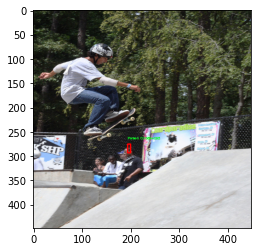

1/1 [==============================] - 0s 22ms/step


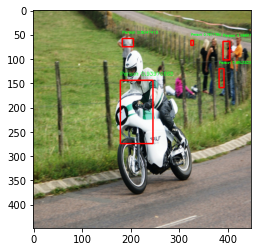

1/1 [==============================] - 0s 21ms/step


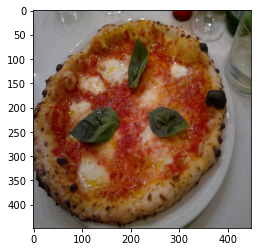

1/1 [==============================] - 0s 22ms/step


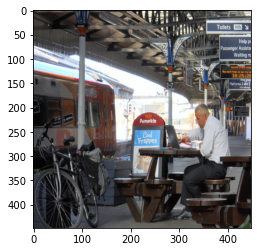

1/1 [==============================] - 0s 22ms/step


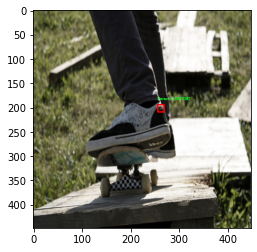

1/1 [==============================] - 0s 21ms/step


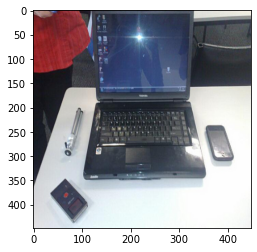

1/1 [==============================] - 0s 21ms/step


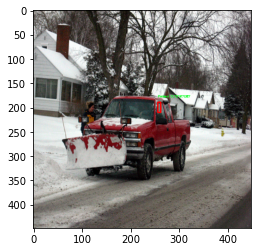

1/1 [==============================] - 0s 22ms/step


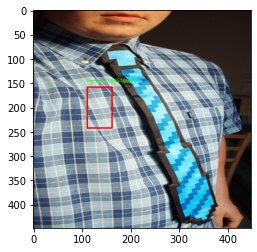

1/1 [==============================] - 0s 22ms/step


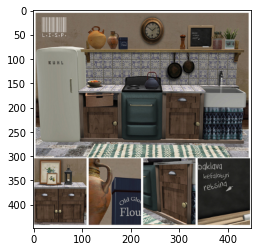

1/1 [==============================] - 0s 21ms/step


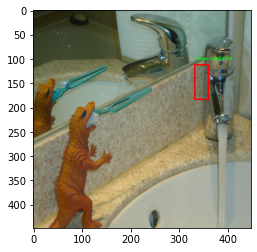

In [15]:
#TEST VISUALIZATION
import random
for h in range(0,10):
    i = random.randint(0,578)
    imagecv2 = cv2.imread(every_path[i])
    imagecv2 = cv2.resize(imagecv2,(448,448))
    loaded_img = load_img(every_path[i], target_size=(448, 448))
    image = img_to_array(loaded_img)
    # scale pixel values to [0, 1]
    image = image.astype('float32')
    image /= 255.0
    in_net = np.expand_dims(image, axis=0) #Expand dimension because the network works with batches as input

    out_net = yolo.predict(in_net)
    out_bboxes = decode_net_out(out_net[0])

    for (P,x, y, w, h) in out_bboxes:
        cv2.rectangle(imagecv2, (x, y), 
                              (x + w, y + h), 
                               (0, 0, 255), 2)
        cv2.putText(imagecv2, 'Person ' + str(P), (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, w/448 + 0.2, (36,255,12), 1)
    imRGB = cv2.cvtColor(imagecv2, cv2.COLOR_BGR2RGB)
    plt.imshow(imRGB)
    plt.show()

In [16]:
prop_bboxes = []
for i in range(0, len(every_path)):
    loaded_img = load_img(every_path[i], target_size=(448, 448))
    image = img_to_array(loaded_img)
    # scale pixel values to [0, 1]
    image = image.astype('float32')
    image /= 255.0
    in_net = np.expand_dims(image, axis=0) #Expand dimension because the network works with batches as input

    out_net = yolo.predict(in_net)
    prop_bboxes.append(decode_net_out(out_net[0]))

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 21ms/step


In [18]:
iou_thr = 0
iou_thresholds = []
yolo_results = np.zeros((100,3))
yolo_precision = np.zeros((100,))
yolo_recall = np.zeros((100,))
yolo_f1 = np.zeros((100,))
yolo_missrate = np.zeros((100,))
for h in range(0,100):
    iou_thr += 0.01  
    iou_thresholds.append(iou_thr)
    tp = 0
    fp = 0
    fn = 0 
    for i in range(0, 578):
        res = get_single_image_results(test_bboxes_scaled[i],prop_bboxes[i],iou_thr)
        tp += res[0]
        fp += res[1]
        fn += res[2]
    yolo_results[h][0] = tp
    yolo_results[h][1] = fp
    yolo_results[h][2] = fn
    prec = tp / (tp + fp)
    rec = tp / (tp + fn)
    yolo_precision[h] = tp / (tp + fp)
    yolo_recall[h] = tp / (tp + fn)
    if(prec + rec != 0):
        yolo_f1[h] = 2 * (prec * rec)/ (prec + rec)
    yolo_missrate[h] = fn / (tp + fn)

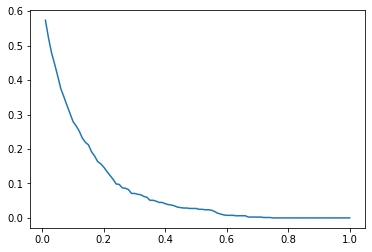

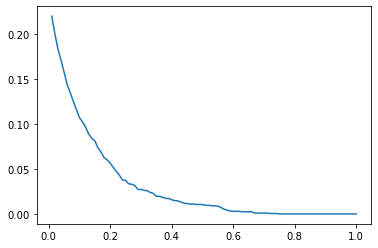

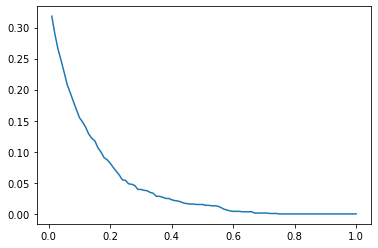

In [19]:
from matplotlib import pyplot
pyplot.plot(iou_thresholds, yolo_precision)
pyplot.show()

pyplot.plot(iou_thresholds, yolo_recall)
pyplot.show()

pyplot.plot(iou_thresholds, yolo_f1)
pyplot.show()

from scipy.io import savemat

#SAVE THE PLOTS

mdic = {"yolo_bigger_precision": yolo_precision}
savemat(r'D:\Yolo_Test\Test_Results\yolo_v2_DW.mat', mdic)

mdic = {"yolo_bigger_recall": yolo_recall}
savemat(r'D:\Yolo_Test\Test_Results\yolo_v2_DW.mat', mdic)

mdic = {"yolo_bigger_f1": yolo_f1}
savemat(r'D:\Yolo_Test\Test_Results\yolo_v2_DW.mat', mdic)

1/1 [==============================] - 0s 21ms/step


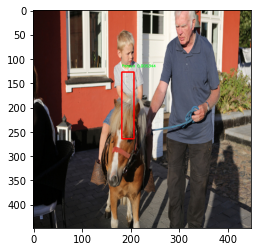

1/1 [==============================] - 0s 22ms/step


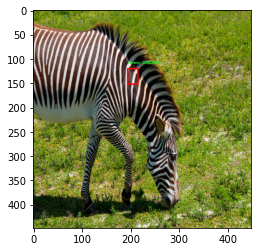

1/1 [==============================] - 0s 22ms/step


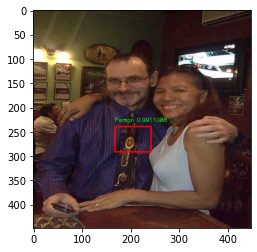

1/1 [==============================] - 0s 22ms/step


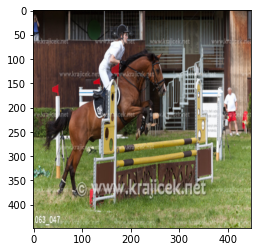

1/1 [==============================] - 0s 21ms/step


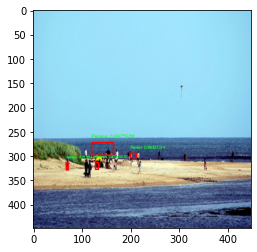

1/1 [==============================] - 0s 21ms/step


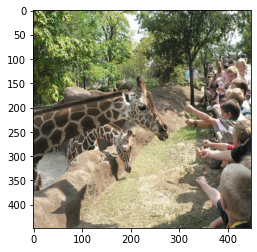

1/1 [==============================] - 0s 22ms/step


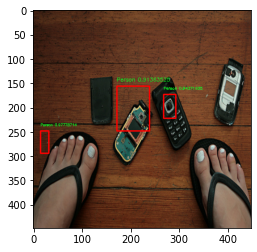

1/1 [==============================] - 0s 23ms/step


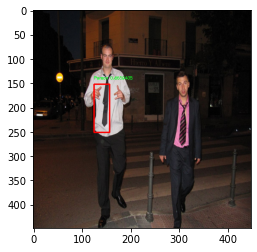

1/1 [==============================] - 0s 22ms/step


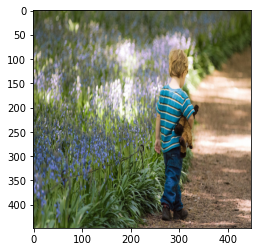

1/1 [==============================] - 0s 22ms/step


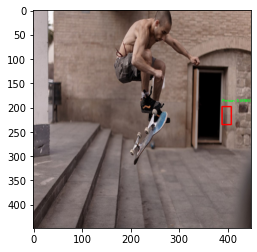

In [20]:
#TEST VISUALIZATION
import random
for h in range(0,10):
    i = random.randint(0,578)
    imagecv2 = cv2.imread(every_path[i])
    imagecv2 = cv2.resize(imagecv2,(448,448))
    loaded_img = load_img(every_path[i], target_size=(448, 448))
    image = img_to_array(loaded_img)
    # scale pixel values to [0, 1]
    image = image.astype('float32')
    image /= 255.0
    in_net = np.expand_dims(image, axis=0) #Expand dimension because the network works with batches as input

    out_net = yolo.predict(in_net)
    out_bboxes = decode_net_out(out_net[0])

    for (P,x, y, w, h) in out_bboxes:
        cv2.rectangle(imagecv2, (x, y), 
                              (x + w, y + h), 
                               (0, 0, 255), 2)
        cv2.putText(imagecv2, 'Person ' + str(P), (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, w/448 + 0.2, (36,255,12), 1)
    imRGB = cv2.cvtColor(imagecv2, cv2.COLOR_BGR2RGB)
    plt.imshow(imRGB)
    plt.show()



In [30]:
#SAVE FOR EMBEDDED DEVICE USE

from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2

f = tf.function(yolo).get_concrete_function(tf.TensorSpec(yolo.inputs[0].shape, yolo.inputs[0].dtype))
f2 = convert_variables_to_constants_v2(f)
graph_def = f2.graph.as_graph_def()

with tf.io.gfile.GFile('yolo_v2_checkpoint.pb', 'wb') as f:
    f.write(graph_def.SerializeToString())